The aim of this workbook is to explore the Integrated Gradients implementation.

### Modell trainieren

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


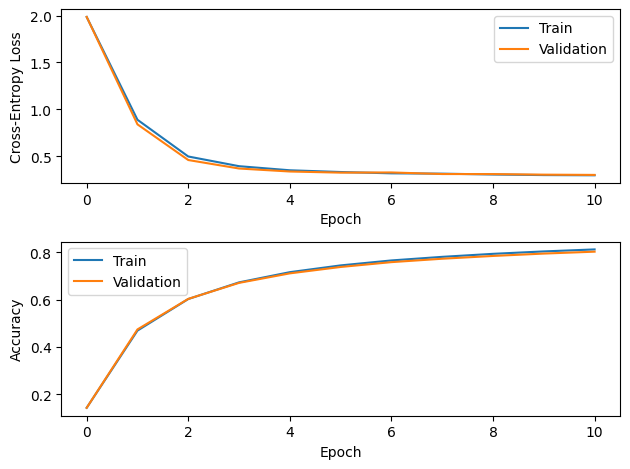

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

In [2]:
import torch

baseline = torch.zeros(16)

print(model.predict(baseline))

tensor([0.0527, 0.0015, 0.0485, 0.2691, 0.3350, 0.0223, 0.2709])


c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


# Instanzweises testen der IG scores

In [3]:
from model.attribution_methods.integrated_gradients import IntegratedGradients
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(mode=DatasetMode.TEST)

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

x,true_y = dataset[0]
model.eval()
pred_y = model.predict(x)

attribution_score = ig.attribute(x,target_label_index=None,n_steps=500)
print("Attribution Scores: "  + str(attribution_score))
print("Reihenfolge: " + str(attribution_score[0].argsort(descending=True)))

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)


Attribution Scores: (tensor([-0.1033, -0.1716, -0.1565, -0.1553,  0.0070, -0.0072, -0.1057, -0.1858,
        -0.1543,  0.1351,  0.3169,  0.1249,  0.6285,  0.4284,  0.0385,  0.0562]), 3)
Reihenfolge: tensor([12, 13, 10,  9, 11, 15, 14,  4,  5,  0,  6,  8,  3,  2,  1,  7])


### Testen des Completeness Axioms durch Veränderung der num_steps

100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


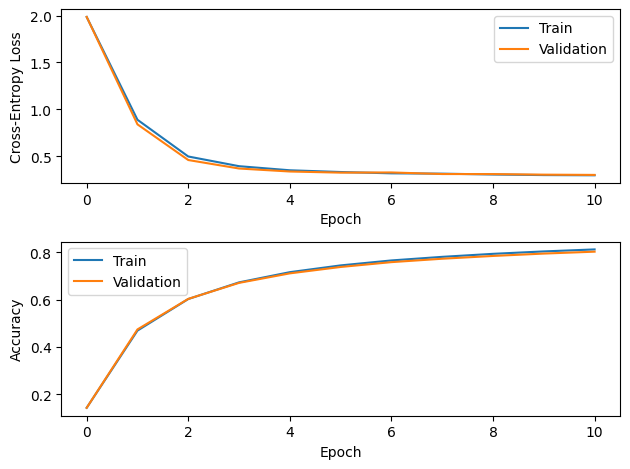

0it [00:00, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:04, 295.89it/s]
700it [00:06, 108.47it/s]

In [4]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)

evaluator.visualize_completess_deltas_comparison(range(10,151,20))

100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


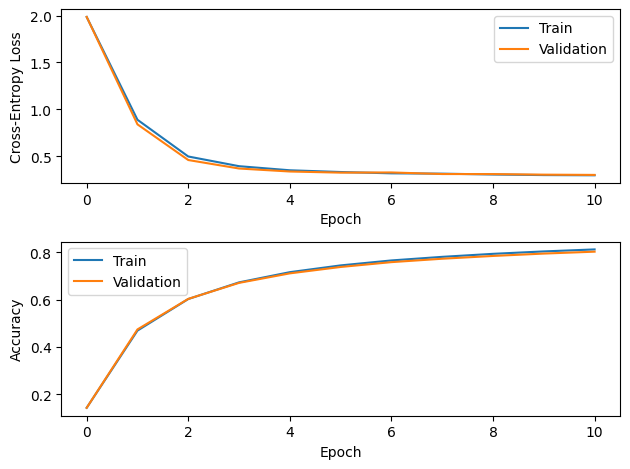

0it [00:00, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:10, 126.89it/s]
1362it [00:20, 66.27it/s]


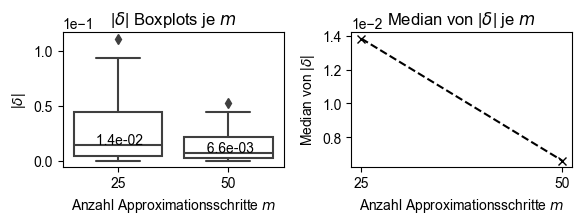

In [ ]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)

evaluator.completeness_deltas_boxplots([25,50])

In [ ]:
evaluator.completeness_deltas_statistics(n_steps=100)

1362it [00:42, 31.96it/s]

Mittlere absolute Abweichung:  5.90e-03
Maximum der betragsmäßigen Abweichung;  2.37e-02
Minimum der betragsmäßigen Abweichung:  1.00e-05


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


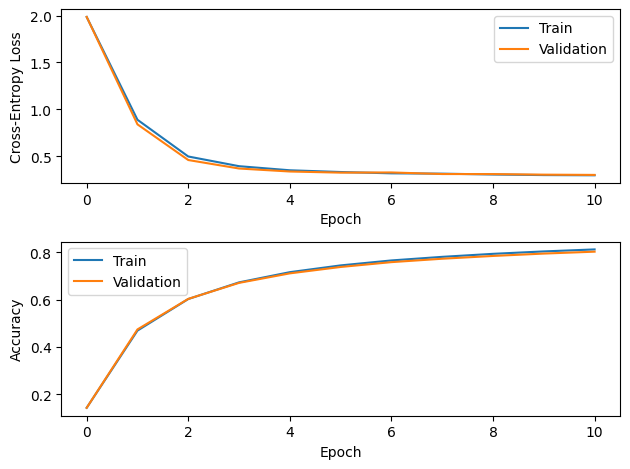

In [ ]:
from model.training import train_model_and_visualize
from model.training import train_autobaseline
import torch

model = train_model_and_visualize([8], num_epochs=10)

testing autobaseline

100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


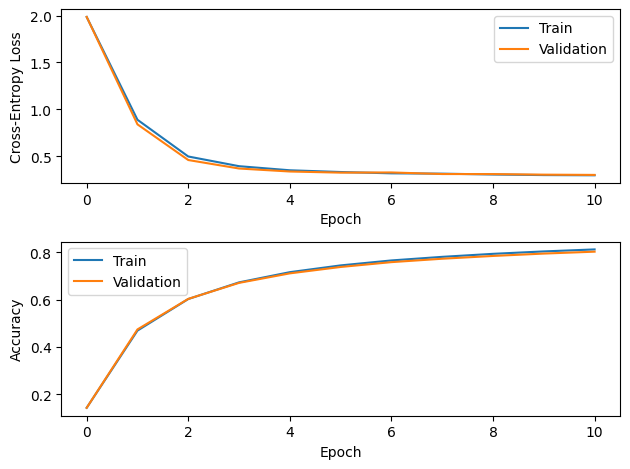

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:10<00:00, 29.15it/s]


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


L1 Loss L_b:  0.020
L1 Loss L_out:  0.062
tensor(0.0026)
tensor(-0.0005)


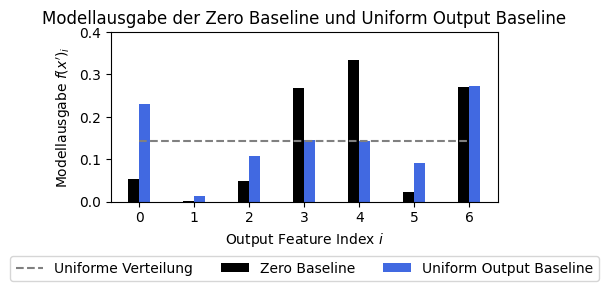

In [1]:
from model.training import train_autobaseline, train_model_and_visualize
from evaluation.utils.visualisation import visualize_baselines_output
import torch
from torch.nn.functional import l1_loss

model = train_model_and_visualize([8], num_epochs=10)

zero_baseline_prediction = model.predict(torch.zeros(16))


uniform_output_baseline = train_autobaseline(model)
uniform_output_baseline_output = model.predict(uniform_output_baseline)

visualize_baselines_output(zero_baseline_prediction,uniform_output_baseline_output)

print(f"L1 Loss L_b: {l1_loss(torch.zeros(16),uniform_output_baseline) : .3f}")
print(f"L1 Loss L_out: {l1_loss(torch.ones(7)*1/7, uniform_output_baseline_output) : .3f}")

print(uniform_output_baseline_output[3]-1/7)
print(uniform_output_baseline_output[4]-1/7)


Testing autobaseline vs zero baseline

100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


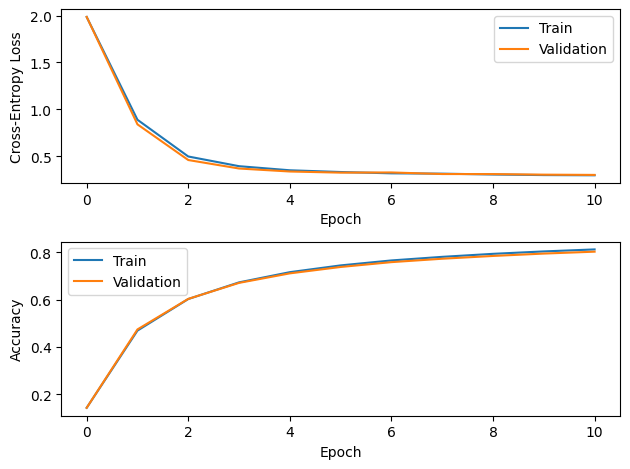

  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:11<00:00, 26.96it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])


100%|██████████| 1362/1362 [00:24<00:00, 56.37it/s]


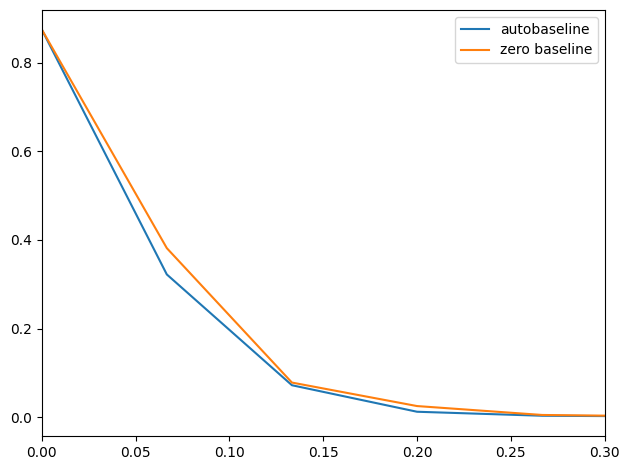

In [ ]:
from model.training import train_model_and_visualize, train_autobaseline
import torch

from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients
import matplotlib.pyplot as plt
import numpy as np

model = train_model_and_visualize([8])

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)
test_dataset = DryBean(DatasetMode.TEST)
am_eval = AttributionMethodsEvaluator(model=model)

uniform_output_baseline = train_autobaseline(model, baseline_error_weight=0.4, num_epochs=300)

log_odds_mean_autobaseline = am_eval.get_log_odds_of_dataset(test_dataset,ig.attribute, apply_log=False,baseline=torch.zeros(16),attribution_baseline=uniform_output_baseline)[1]
log_odds_mean_zerobaseline = am_eval.get_log_odds_of_dataset(test_dataset,ig.attribute, apply_log=False,baseline=torch.zeros(16),attribution_baseline=torch.zeros(16))[1]

x = np.linspace(0, 1, 16)
plt.plot(x,log_odds_mean_autobaseline, label="autobaseline")
plt.plot(x,log_odds_mean_zerobaseline, label="zero baseline")
plt.xlim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


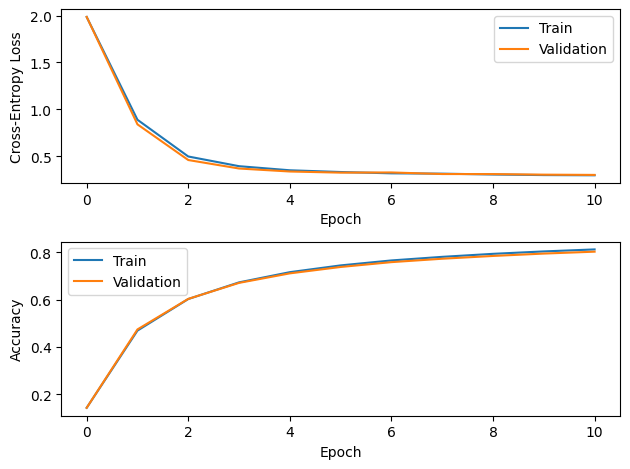

  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:10<00:00, 28.09it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])


100%|██████████| 1362/1362 [00:03<00:00, 369.89it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\evaluation\utils\visualisation.py:147: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = plt.legend(handles, labels=labels,bbox_to_anchor =(0,-0.28), loc='upper center',ncols=3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


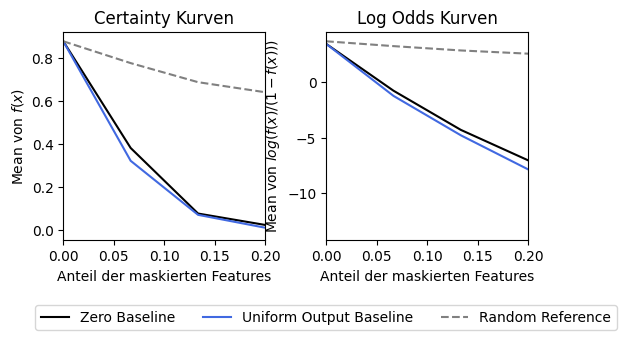

In [1]:
from model.training import train_model_and_visualize, train_autobaseline


from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients


model = train_model_and_visualize([8])

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)
test_dataset = DryBean(DatasetMode.TEST)
am_eval = AttributionMethodsEvaluator(model=model)

uniform_output_baseline = train_autobaseline(model, baseline_error_weight=0.4, num_epochs=300)

am_eval.visualize_comparison_log_odds_of_zero_uniform_output_baseline(uniform_output_baseline, ig.attribute)

100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


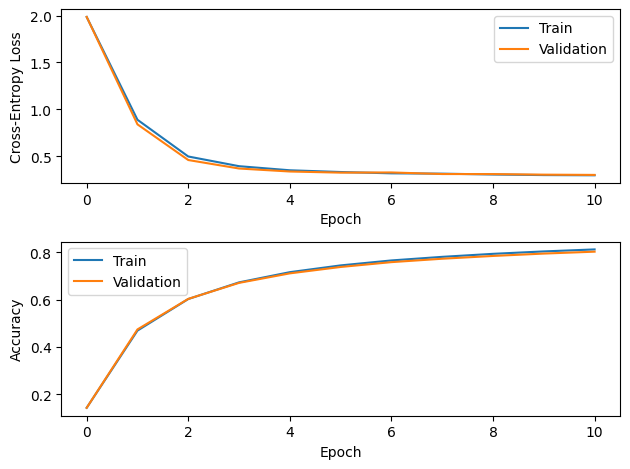

  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:10<00:00, 28.13it/s]
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])
Uniform Output Baseline:


100%|██████████| 1362/1362 [00:24<00:00, 55.31it/s]


[8.75830137e-01 3.22148840e-01 7.18824552e-02 1.19781616e-02
 2.94859585e-03 1.41115646e-03 5.52140833e-04 3.88438020e-04
 3.34428566e-04 3.92702924e-04 5.54183332e-04 1.00136824e-03
 1.61067944e-03 3.73084103e-03 1.16127656e-02 4.67305919e-02]
Zero Baseline


100%|██████████| 1362/1362 [00:24<00:00, 55.60it/s]


[8.75830137e-01 3.81566153e-01 7.79033590e-02 2.48280812e-02
 4.71207527e-03 1.58975896e-03 6.42329767e-04 4.72930920e-04
 4.78641209e-04 6.17264030e-04 7.84743794e-04 9.27465138e-04
 1.33906753e-03 2.71916024e-03 9.04274828e-03 3.63260204e-02]
Uniform Output Baseline:


100%|██████████| 1362/1362 [00:24<00:00, 55.13it/s]


[3.69736966e+00 7.74628229e-01 1.55144047e-01 2.35578199e-02
 5.74787624e-03 2.74880793e-03 1.09994346e-03 7.72939165e-04
 6.65226704e-04 7.81966498e-04 1.10319211e-03 1.97609970e-03
 3.20086118e-03 7.40070462e-03 2.28298802e-02 8.97025457e-02]


100%|██████████| 1362/1362 [00:24<00:00, 56.01it/s]

[3.69736966e+00 1.09449675e+00 1.65509793e-01 4.74584358e-02
 9.13367964e-03 3.11872867e-03 1.27639738e-03 9.42332741e-04
 9.54597825e-04 1.23142090e-03 1.56536297e-03 1.85052722e-03
 2.66913991e-03 5.40748301e-03 1.78503019e-02 7.02646847e-02]


In [1]:
from model.training import train_model_and_visualize, train_autobaseline


from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from data.datasets import DryBean
from data.util.utils import DatasetMode
from model.attribution_methods.integrated_gradients import IntegratedGradients


model = train_model_and_visualize([8])

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)
test_dataset = DryBean(DatasetMode.TEST)
am_eval = AttributionMethodsEvaluator(model=model)

uniform_output_baseline = train_autobaseline(model, baseline_error_weight=0.4, num_epochs=300)

print("Uniform Output Baseline:")
print(am_eval.get_log_odds_of_dataset(
    test_dataset,ig.attribute,False,attribution_baseline=uniform_output_baseline
)[1])

print("Zero Baseline")

print(am_eval.get_log_odds_of_dataset(
    test_dataset,ig.attribute,False
)[1])

print("Uniform Output Baseline:")
print(am_eval.get_log_odds_of_dataset(
    test_dataset,ig.attribute,True,attribution_baseline=uniform_output_baseline
)[1])


print(am_eval.get_log_odds_of_dataset(
    test_dataset,ig.attribute,True
)[1])